
# Task 6.6: Sourcing Analyzing Time Series Data


### Step 01 - Importing Your Libraries and Data

In [1]:
#Step 1.1: Importing Necessary Libraries; 

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from pathlib import Path
import matplotlib.dates as mdates
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')


In [2]:
#Step 1.2: Importing Dataset; 

path ='/users/ibu/Documents/Bike Rental Analysis' #Creating a Folderpath for the Dataset

quandl.ApiConfig.api_key = '1xFdxrPGPkZH9hvzUjZb' #Configuring the 'API' Key

data = quandl.get_table('ZILLOW/DATA') #Importing the Dataframe

In [3]:
data.shape #Checking Dataframe Shape

(10000, 4)

In [4]:
data.head() #Viewing Dataframe Columns and Rows

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2023-01-31,442972.823112
1,ZSFH,99999,2022-12-31,447792.833388
2,ZSFH,99999,2022-11-30,452608.490554
3,ZSFH,99999,2022-10-31,552233.000000
4,ZSFH,99999,2022-09-30,569345.000000


In [5]:
data.dtypes #Checking data types

indicator_id            object
region_id               object
date            datetime64[ns]
value                  float64
dtype: object


### Step 02 - Subsetting, Wrangling & Data Cleaning


In [6]:
#Step 2.1: New Sub-Dataset on Date and Value;

sub_data= data.groupby('date')['value'].sum()

In [7]:
sub_data.head(10)

date
1996-01-31    1135696.0
1996-02-29    1140810.0
1996-03-31    1143220.0
1996-04-30    1149464.0
1996-05-31    1158118.0
1996-06-30    1170281.0
1996-07-31    1185096.0
1996-08-31    1199812.0
1996-09-30    1212490.0
1996-10-31    1224787.0
Name: value, dtype: float64

In [8]:
sub_data = sub_data.astype({"value": 'int'})

In [9]:
sub_data

date
1996-01-31     1135696
1996-02-29     1140810
1996-03-31     1143220
1996-04-30     1149464
1996-05-31     1158118
                ...   
2022-09-30    18772318
2022-10-31    18635979
2022-11-30    16542836
2022-12-31    16417588
2023-01-31    14406277
Name: value, Length: 325, dtype: int64

In [10]:
sub_data.shape #Checking for dataset shape

(325,)

In [11]:
sub_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 325 entries, 1996-01-31 to 2023-01-31
Series name: value
Non-Null Count  Dtype
--------------  -----
325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


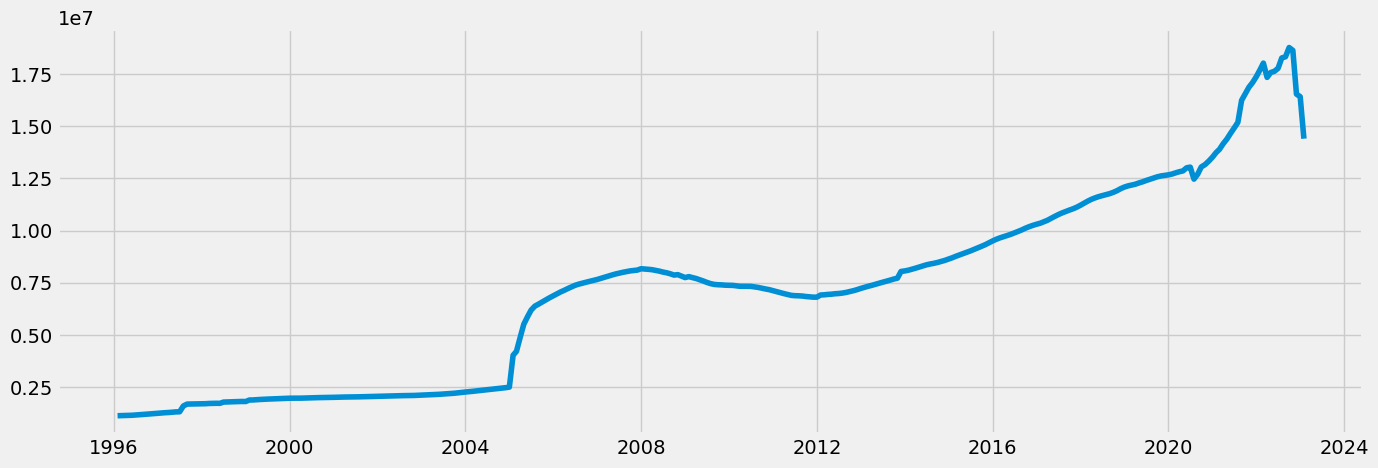

In [12]:
#Step 2.2: Plotting the Data Using Matplotlib;

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sub_data)

In [13]:
#Step 2.3: Checking for Missing Values;

sub_data.isnull().sum()

0

In [14]:
#Step 2.4: Checking for Duplicates; 

sub_dups = sub_data.duplicated()

sub_dups.sum()

0


### Step 03 - Time-Series Analysis: Decomposition


In [15]:
#Step 3.1: Decomposing Time-Series Using an Additive Model;

decomposition = sm.tsa.seasonal_decompose(sub_data, model='additive')


In [16]:
#Step 3.2: Importing pylab;

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7


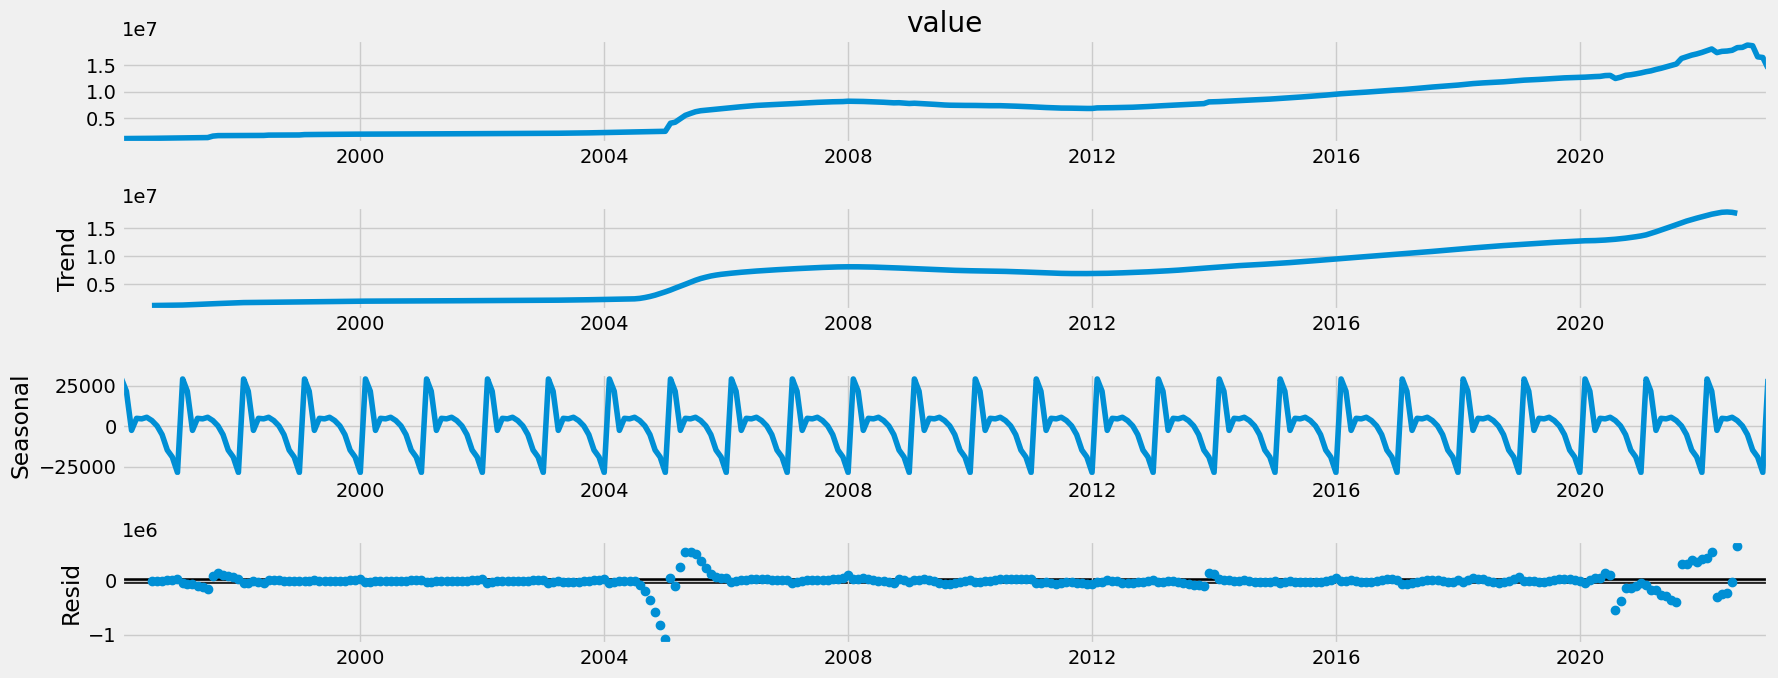

In [17]:
#Step 3.2: Plotting the Separate Components; 

decomposition.plot()
plt.show()


### Notes: 

<b>1. There is an upward-downward patterns under seasonality 

<b>2. The trend lines highlight slighlty upward direction in terms of house value.


### Step 04 - Testing for Stationarity


In [18]:
#Step 4.1: Stationarity Test; 

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [19]:
#Step 4.2: Apply the test using the function on the time series;

dickey_fuller(sub_data['value'])

KeyError: 'value'

### Unable to fix this part of the error on 'value'. Tutor's help could be needed.

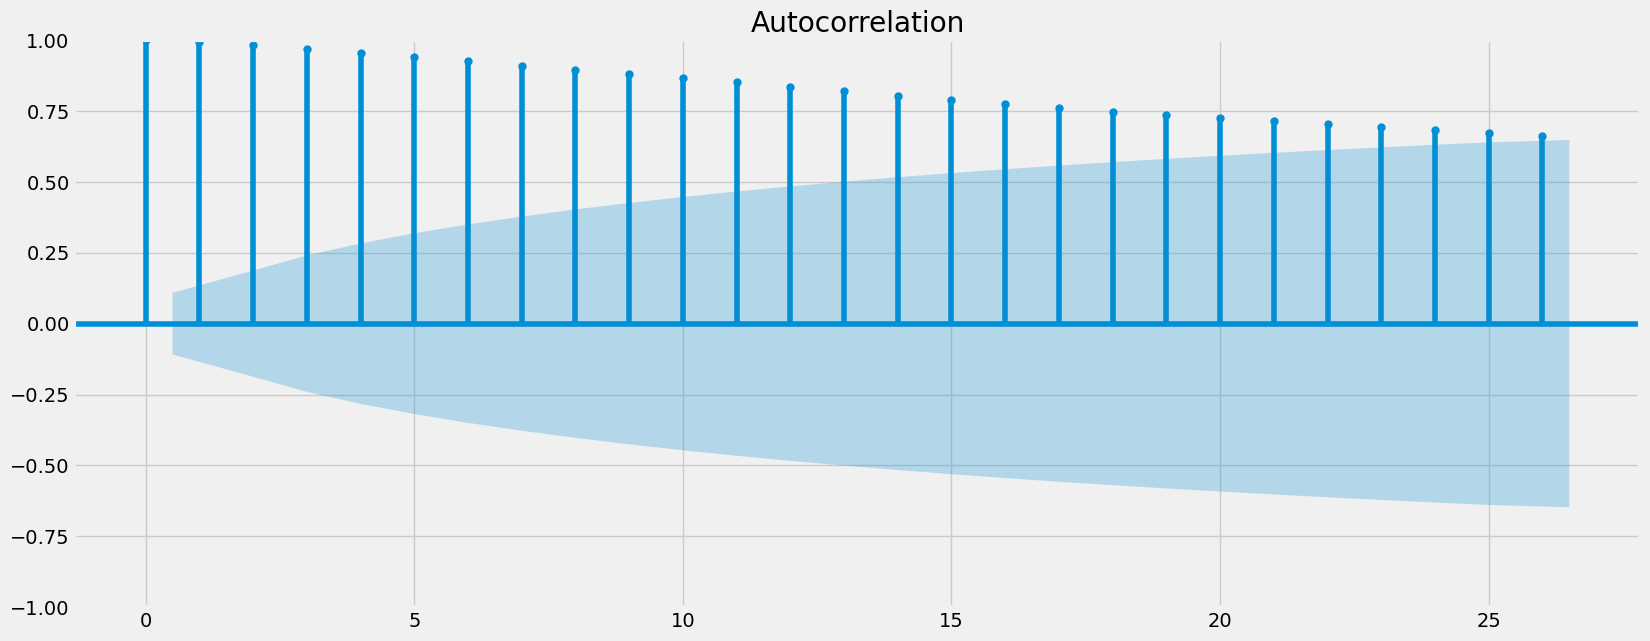

In [20]:
#Step 4.3: Checking Out a Plot of Auto-Correlations;

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub_data)
plt.show()


### Step 05 - Additional Time-Series


In [21]:
sub_data.head(5)

date
1996-01-31    1135696
1996-02-29    1140810
1996-03-31    1143220
1996-04-30    1149464
1996-05-31    1158118
Name: value, dtype: int64

In [22]:
#Step 5.2: Resetting Index fo 'date' Column to be Used as a Filter; 

end_data = sub_data.reset_index()
end_data.head()

,date,value
0,1996-01-31,1135696
1,1996-02-29,1140810
2,1996-03-31,1143220
3,1996-04-30,1149464
4,1996-05-31,1158118


In [23]:
end_data.columns

Index(['date', 'value'], dtype='object')

In [24]:
# set 'date' column as the index

from datetime import datetime

end_data['datetime'] = pd.to_datetime(end_data['date']) # Create a datetime column from "Date.""
end_data = end_data.set_index('datetime') # Set the datetime as the index of the dataframe.
end_data.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
end_data.head()

,value
datetime,
1996-01-31,1135696
1996-02-29,1140810
1996-03-31,1143220
1996-04-30,1149464
1996-05-31,1158118


In [25]:
#DataFrame after removing rows with NaN value
end_data_clean = end_data.dropna(how='all')#

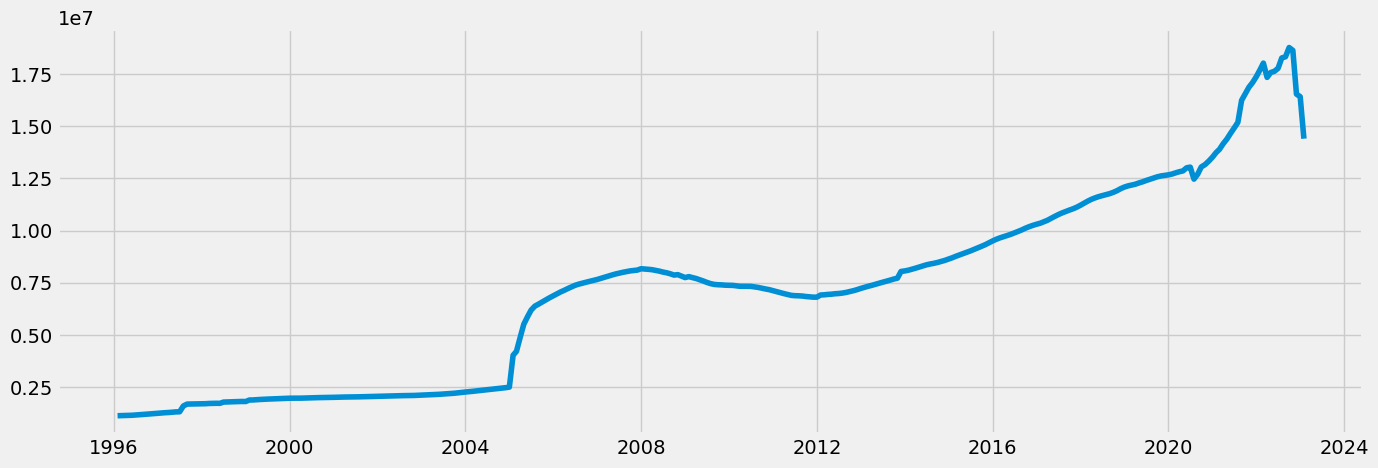

In [26]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(end_data_clean)

In [27]:
data_diff = end_data_clean - end_data_clean.shift(1)

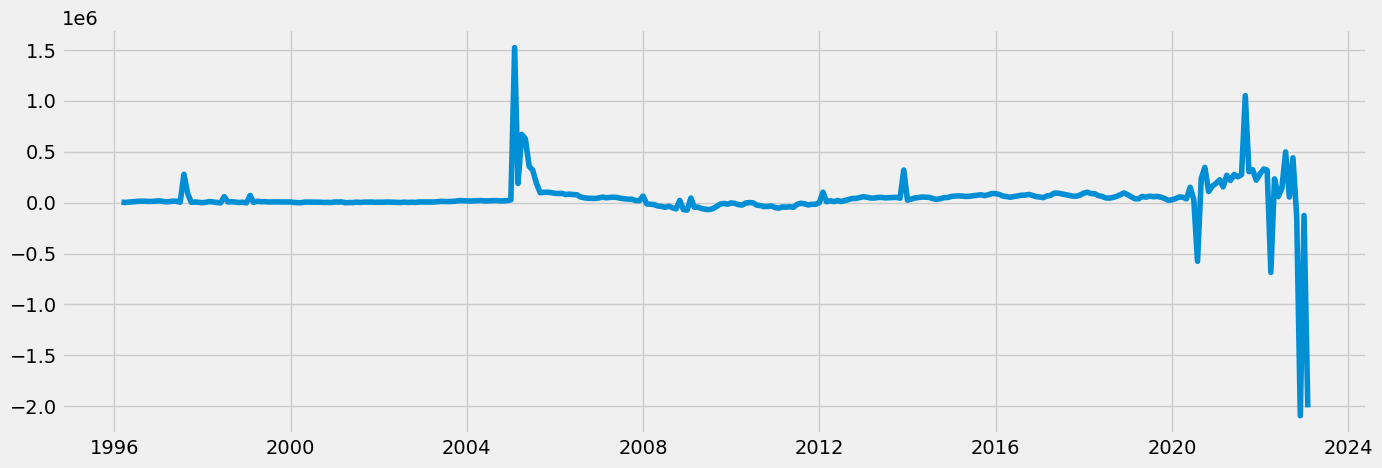

In [28]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [29]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:


MissingDataError: exog contains inf or nans

### I am unable to see conclusions due to inability to solve the error.